In [ ]:
import pandas as pd
df=pd.read_csv('/content/hiring - Sheet1.csv')
df

,Experience,test_score,Interview_score,Salary($)
0,NaN,8.0,9,50000
1,NaN,8.0,6,45000
2,five,6.0,7,60000
3,two,10.0,10,65000
4,seven,9.0,6,70000
5,three,7.0,10,62000
6,ten,NaN,7,72000
7,eleven,7.0,8,80000


In [ ]:
import math
test_scoremedian=math.floor(df['test_score'].median())
test_scoremedian

8

In [ ]:
df['test_score']=df['test_score'].fillna(test_scoremedian)
df

,Experience,test_score,Interview_score,Salary($)
0,NaN,8.0,9,50000
1,NaN,8.0,6,45000
2,five,6.0,7,60000
3,two,10.0,10,65000
4,seven,9.0,6,70000
5,three,7.0,10,62000
6,ten,8.0,7,72000
7,eleven,7.0,8,80000


In [ ]:
df['Experience']=df['Experience'].fillna('zero')
df

,Experience,test_score,Interview_score,Salary($)
0,zero,8.0,9,50000
1,zero,8.0,6,45000
2,five,6.0,7,60000
3,two,10.0,10,65000
4,seven,9.0,6,70000
5,three,7.0,10,62000
6,ten,8.0,7,72000
7,eleven,7.0,8,80000


In [ ]:
#Installing 3rd party libraries in colab using!
!pip install word2number

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from word2number import w2n

#Apply lambda function
Whenever we want to apply some operations on all data of a column we have to use the apply() function.

In [2]:
#Approach 1 using native python function
def convertword2number(x):
  return w2n.word_to_num(x)

In [3]:
df['Experience']=df['Experience'].apply(convertword2number)
df

NameError: ignored

In [ ]:
#Approach 2 using Lambda
df['Experience']=df['Experience'].apply(lambda x: w2n.word_to_num(x))
df

,Experience,test_score,Interview_score,Salary($)
0,0,8.0,9,50000
1,0,8.0,6,45000
2,5,6.0,7,60000
3,2,10.0,10,65000
4,7,9.0,6,70000
5,3,7.0,10,62000
6,10,8.0,7,72000
7,11,7.0,8,80000


In [ ]:
df

,Experience,test_score,Interview_score,Salary($)
0,0,8.0,9,50000
1,0,8.0,6,45000
2,5,6.0,7,60000
3,2,10.0,10,65000
4,7,9.0,6,70000
5,3,7.0,10,62000
6,10,8.0,7,72000
7,11,7.0,8,80000


In [ ]:
import matplotlib.pyplot as plt

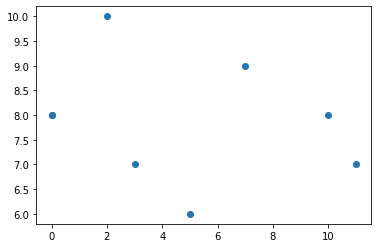

In [ ]:
plt.scatter(df['Experience'],df['test_score'])

#Preparing X and Y

In [ ]:
X=df.drop('Salary($)',axis=1)
X

,Experience,test_score,Interview_score
0,0,8.0,9
1,0,8.0,6
2,5,6.0,7
3,2,10.0,10
4,7,9.0,6
5,3,7.0,10
6,10,8.0,7
7,11,7.0,8


In [ ]:
Y=df['Salary($)']
Y

0    50000
1    45000
2    60000
3    65000
4    70000
5    62000
6    72000
7    80000
Name: Salary($), dtype: int64

#Machine Learning Part

In [ ]:
#scikit learn
#algorithm 1 - importing Library
from sklearn import linear_model

In [ ]:
#algorithm 2 - create a reference object to the linear model module
reg=linear_model.LinearRegression()

In [ ]:
#algorithm 3 - we have to train the data
reg.fit(X,Y)

LinearRegression()

In [ ]:
#algorithm 4 - Predict the output / testing the data
reg.predict([[4,7.0,9]])

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


array([61756.18631732])

#Understanding the ML

In [ ]:
m=reg.coef_
m

array([2812.95487627, 1845.70596798, 2205.24017467])

In [ ]:
m=reg.coef_
m1=2812.95487627
m2=1845.70596798
m3=2205.24017467

In [ ]:
b=reg.intercept_
b

17737.263464337688

In [ ]:
y=(m1*4)+(m2*7.0)+(m3*9)+b
y

61756.18631730769

#Downloading the model using Pickle

In [ ]:
#import the pickle library
import pickle

In [ ]:
#create a file object by creating a new file than can write binary data and that can be stored to a pickle file
#to open a new file
with open('hiringmodel','wb') as f:
  pickle.dump(reg,f)